In [119]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import math
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
import operator
import matplotlib.pyplot as plt 

In [21]:
iris = load_iris()


In [53]:
x = iris.data
y = iris.target


In [51]:
setosa_val = x[0:50]
setosa_label = y[0:50]
versicolor_val , versicolor_label = x[50:100] , y[50:100]
verginica_val , verginica_label = x[100:150] ,y[100:150]

In [58]:

setosa_train,setosa_test,setosa_label_train,setosa_label_test=train_test_split(setosa_val,setosa_label,test_size=0.2)
versicolor_train,versicolor_test,versicolor_label_train,versicolor_label_test=train_test_split(versicolor_val,versicolor_label,test_size=0.2)
verginica_train,verginica_test,verginica_label_train,verginica_label_test=train_test_split(verginica_val,verginica_label,test_size=0.2)


In [59]:
print(versicolor_train," ",versicolor_test,versicolor_label_train,versicolor_label_test)

[[5.8 2.6 4.  1.2]
 [5.7 2.9 4.2 1.3]
 [6.6 3.  4.4 1.4]
 [5.9 3.  4.2 1.5]
 [6.  2.7 5.1 1.6]
 [6.7 3.1 4.4 1.4]
 [5.4 3.  4.5 1.5]
 [7.  3.2 4.7 1.4]
 [6.1 2.8 4.  1.3]
 [5.6 2.7 4.2 1.3]
 [5.6 3.  4.5 1.5]
 [6.6 2.9 4.6 1.3]
 [6.3 3.3 4.7 1.6]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [5.8 2.7 3.9 1.2]
 [5.5 2.5 4.  1.3]
 [6.  2.2 4.  1. ]
 [5.5 2.3 4.  1.3]
 [6.9 3.1 4.9 1.5]
 [6.1 3.  4.6 1.4]
 [6.  3.4 4.5 1.6]
 [6.2 2.9 4.3 1.3]
 [5.7 2.6 3.5 1. ]
 [6.8 2.8 4.8 1.4]
 [5.6 2.9 3.6 1.3]
 [5.7 2.8 4.1 1.3]
 [6.7 3.  5.  1.7]
 [5.8 2.7 4.1 1. ]
 [5.2 2.7 3.9 1.4]
 [6.7 3.1 4.7 1.5]
 [6.1 2.9 4.7 1.4]
 [5.9 3.2 4.8 1.8]
 [6.1 2.8 4.7 1.2]
 [6.4 3.2 4.5 1.5]
 [6.2 2.2 4.5 1.5]
 [5.5 2.4 3.7 1. ]
 [5.  2.  3.5 1. ]
 [5.6 2.5 3.9 1.1]
 [5.5 2.4 3.8 1.1]]   [[5.6 3.  4.1 1.3]
 [5.5 2.6 4.4 1.2]
 [6.4 2.9 4.3 1.3]
 [6.3 2.5 4.9 1.5]
 [5.7 3.  4.2 1.2]
 [5.1 2.5 3.  1.1]
 [4.9 2.4 3.3 1. ]
 [6.  2.9 4.5 1.5]
 [6.3 2.3 4.4 1.3]
 [5.  2.3 3.3 1. ]] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [61]:
xMean1 = np.mean(setosa_train,axis=0)
xMean2 = np.mean(versicolor_train,axis=0)
xMean3 = np.mean(verginica_train,axis=0)

In [62]:
    print("Mean of the C1 = ",xMean1)
    print("Mean of the C2 = ",xMean2)
    print("Mean of the C3 = ",xMean3)

Mean of the C1 =  [4.9975 3.3825 1.455  0.2475]
Mean of the C2 =  [6.     2.8025 4.315  1.3475]
Mean of the C3 =  [6.5675 2.975  5.5225 2.02  ]


In [63]:
    covX1 = np.cov(setosa_train,rowvar=False)
    covX2 = np.cov(versicolor_train,rowvar=False)
    covX3 = np.cov(verginica_train,rowvar=False)

In [64]:
    invCov1 = np.linalg.inv(covX1)
    invCov2 = np.linalg.inv(covX2)
    invCov3 = np.linalg.inv(covX3)

In [66]:
det1 = np.linalg.det(invCov1)
det2 = np.linalg.det(invCov2)
det3 = np.linalg.det(invCov3)

In [67]:
    print("Coveriance Matrice C1= \n",covX1)
    print("Inverse Of Cov C1= \n",invCov1)
    print("Det of inv of C1 ",det1)

    print("Coveriance Matrice C2= \n",covX2)
    print("Inverse Of Cov C2= \n",invCov2)
    print("Det of inv of C2 ",det2)

    print("Coveriance Matrice C3= \n",covX3)
    print("Inverse Of Cov C3= \n",invCov3)
    print("Det of inv of C3 ",det3)

Coveriance Matrice C1= 
 [[0.11922436 0.09175    0.01962821 0.01063462]
 [0.09175    0.1348141  0.0140641  0.00957051]
 [0.01962821 0.0140641  0.03125641 0.0070641 ]
 [0.01063462 0.00957051 0.0070641  0.01178846]]
Inverse Of Cov C1= 
 [[ 18.88507513 -11.99015794  -5.56795705  -3.96582119]
 [-11.99015794  15.64617467   1.05899872  -2.52043685]
 [ -5.56795705   1.05899872  39.40986859 -19.4527023 ]
 [ -3.96582119  -2.52043685 -19.4527023  102.10940049]]
Det of inv of C1  476248.29291473195
Coveriance Matrice C2= 
 [[0.24102564 0.08461538 0.14230769 0.04358974]
 [0.08461538 0.09973718 0.07970513 0.04321154]
 [0.14230769 0.07970513 0.17258974 0.06362821]
 [0.04358974 0.04321154 0.06362821 0.03948077]]
Inverse Of Cov C2= 
 [[  9.52872961  -4.96149132  -9.0896107    9.55894259]
 [ -4.96149132  22.19267217   1.91531073 -21.89869076]
 [ -9.0896107    1.91531073  23.3521151  -29.69554333]
 [  9.55894259 -21.89869076 -29.69554333  86.6011086 ]]
Det of inv of C2  67566.98063502667
Coveriance Matr

In [68]:
power1 = math.pow(distance.mahalanobis(setosa_test[0],xMean1,invCov1),2)
print(power1)

4.298847085134468


In [70]:
pw1_1 = multivariate_normal.pdf(setosa_test[0], mean=xMean1, cov=covX1);

In [71]:
print(pw1_1)

2.0373901184975676


In [73]:
pw1 = 1/3;pw1


0.3333333333333333

In [75]:
pw2 =1/3;pw3=1/3

In [113]:
ans_setosa_test = []
# result_setosa = []
ans_versicolor_test = []
# result_versicolor = []
ans_verginica_test = []
# result_verginica = []

for x1,x2,x3 in zip(setosa_test,versicolor_test,verginica_test):
    temp1 ={}
    temp1[0]=multivariate_normal.pdf(x1, mean=xMean1, cov=covX1);
    temp1[1]=multivariate_normal.pdf(x1, mean=xMean2, cov=covX2);
    temp1[2]=multivariate_normal.pdf(x1, mean=xMean3, cov=covX3);
    res1 = max(temp1.items(), key=operator.itemgetter(1))[0]
#     print(res1)
    ans_setosa_test.append(res1)
    
    
    temp2 ={}
    temp2[0]=multivariate_normal.pdf(x2, mean=xMean1, cov=covX1);
    temp2[1]=multivariate_normal.pdf(x2, mean=xMean2, cov=covX2);
    temp2[2]=multivariate_normal.pdf(x2, mean=xMean3, cov=covX3);
    res2 = max(temp2.items(), key=operator.itemgetter(1))[0]
#     print(res2)
    ans_versicolor_test.append(res2)
    
    
    temp3 ={}
    temp3[0]=multivariate_normal.pdf(x3, mean=xMean1, cov=covX1);
    temp3[1]=multivariate_normal.pdf(x3, mean=xMean2, cov=covX2);
    temp3[2]=multivariate_normal.pdf(x3, mean=xMean3, cov=covX3);
    res3 = max(temp1.items(), key=operator.itemgetter(1))[0]
#     print(res3)
    ans_verginica_test.append(res3)
    pass

print(ans_verginica_test,ans_versicolor_test,ans_setosa_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 1, 1, 2, 1, 1, 1, 1, 1, 1] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [109]:
sum1,sum2,sum3= 0,0,0;print(sum1,sum2,sum3)
for res1,res2,res3 in zip(ans_setosa_test,ans_versicolor_test,ans_verginica_test):
    if res1 == 0:
        sum1 = sum1 + 1
    if res2 == 1:
        sum2 = sum2 + 1
    if res3== 2:
        sum3 = sum3 + 1
    pass
print(sum1,sum2,sum3)

0 0 0
10 9 0


In [122]:
acc1 = sum1 / 10
acc2 = sum2 / 10
acc3 = sum3 / 10
accOverall = (sum1 + sum2 + sum3)/30
valPlot = []
valPlot.append(acc1)
valPlot.append(acc2)
valPlot.append(acc3)
valPlot.append(accOverall)
print(valPlot)

[1.0, 0.9, 0.0, 0.6333333333333333]


In [124]:
labelPlot = ["Setosa","Versicolor","Verginica","Overal"]

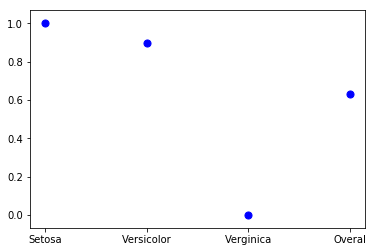

In [131]:
plt.scatter(labelPlot,valPlot,label="Accuracy vs Class",color="blue",s=50)

In [129]:
plt.show()